In [1]:
! ls -al data/.raw/GFS_data

total 416208
drwxr-xr-x 2 slimbook slimbook 212992 ago  1 16:41 .
drwxr-xr-x 3 slimbook slimbook   4096 ago  4 15:15 ..
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010100_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010106_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010112_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010118_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010200_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010206_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010212_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010218_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010300_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010306_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010312_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_

-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010418_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010500_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010506_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010512_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010518_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010600_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010606_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010612_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010618_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010700_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010706_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010712_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016010718_f006.gra
-rw-r--r-- 1 slimbook sli

In [2]:
from os import listdir
import numpy as np
import folium
import matplotlib.pyplot as plt

base_dir = 'data/.raw/GFS_data'

content = []
filenames = []
for file in listdir(base_dir):
    file_path = f'{base_dir}/{file}'
    #array = np.fromfile(file_path +"/"+ file, dtype=np.float32)
    filenames.append(file)
    content.append(np.fromfile(file_path, dtype=np.float32)[21762:21879])
    
print(content[0])
print(filenames[0])
print(len(content[0]))
print(len(listdir(base_dir)))

[5.65383    4.1774874  5.518496   5.0348883  4.0402226  4.305276
 5.159118   5.783321   6.29263    5.920008   5.2546077  4.3602753
 3.80958    4.0512342  3.570224   5.9944644  4.7828965  4.3901024
 4.05021    4.763297   5.6126018  5.7884884  5.4167333  6.970351
 6.8723283  4.5906425  2.6394887  3.2539976  4.9595566  4.6292977
 3.5873806  3.5749824  6.168468   6.554464   7.3625674  6.25
 6.484944   6.9186196  5.67       2.3977697  2.3124878  4.814239
 3.138184   3.6416616  3.4891403  3.184415   3.0800648  3.6657603
 4.677403   7.2479305  5.489308   5.07347    0.42999998 3.0056112
 5.371126   4.4653444  5.2941666  4.7535353  2.9939272  2.6160274
 1.5388308  3.2964528  5.8286533  6.2514157  3.1663542  1.8179383
 2.9080062  2.2487552  4.872309   3.282834   4.4753213  5.2918143
 3.9636471  3.3104076  4.3675733  4.7530303  1.4462711  4.1
 4.3510914  2.4374166  3.1461086  3.0870697  0.84023803 4.5985756
 5.4588094  5.7118998  5.9035583  6.498992   6.162629   4.661695
 3.9609342  3.5141144  2.

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import json
    
def get_date(base_dir):    
    new_time = []    
    for file in listdir(base_dir):
        file_path = f'{base_dir}/{file}'
        match=file.split("_")[1]
        date = pd.to_datetime(match, format = "%Y%m%d%H").strftime('%d/%m/%Y')
        time = (datetime.strptime(match, "%Y%m%d%H") + timedelta(hours=6)).strftime('%H:%M')
        new_time.append(date + " " + time) 
    return new_time
    
        #for i in range(len(main_dic.keys())):
    #dict_final.update({datetime_key:content})
    # VEL -- [21762:21879]

def get_vvel(base_dir):
    """TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
        EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
        SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
        TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
    """
    content = []
    filenames = []
    filenames.append(get_date(base_dir))
    for file in listdir(base_dir):
        file_path = f'{base_dir}/{file}'
        filenames.append(file)
        content.append(np.fromfile(file_path, dtype=np.float32)[21762:21879])
    
    return pd.DataFrame(data=content)

In [4]:
df_data = get_vvel(base_dir)
dates = good_name(base_dir)


In [5]:
df_data.index = dates

In [195]:
type(df_data)


pandas.core.frame.DataFrame

In [6]:
csv_path = ("/home/slimbook/git-repos/eolo-project/data/processed/power_data.csv")

def setting_X(dictionary):
    meteo_df = pd.DataFrame(dictionary).T
    meteo_df.reset_index(level=0, inplace=True)
    meteo_df["date"]=pd.to_datetime(meteo_df['index'], format='%d/%m/%Y %H:%M')
    meteo_df=meteo_df.sort_values(by='date',ascending=True)
    meteo_df=meteo_df.set_index("date").sort_index().loc[:'31/12/2016 00:00']
    meteo_df=meteo_df[[x for x in meteo_df.columns if x != 'index']]

    return meteo_df


def setting_y(csv_file):
    power_df = pd.read_csv(csv_file)
    power_df['date'] = pd.to_datetime(power_df['date'], format='%d/%m/%Y %H:%M')
    power_df = power_df.sort_values(by='date',ascending=True)
    power_df=power_df.set_index("date").sort_index().loc[:'31/12/2016 00:00']

    return power_df

In [7]:
meteo = df_data

In [8]:
meteo.reset_index(level=0, inplace=True)
meteo["date"]=pd.to_datetime(meteo['index'], format='%d/%m/%Y %H:%M')
meteo=meteo.sort_values(by='date',ascending=True)
meteo=meteo.set_index("date").sort_index().loc[:'31/12/2016 00:00']
meteo=meteo[[x for x in meteo.columns if x != 'index']]

In [9]:
power = setting_y(csv_path)

train = pd.concat([power, meteo], axis=1, join="inner")
train.sort_index(ascending=True, inplace=True)

X = train[[x for x in train.columns if x != 'Production']]
y = pd.DataFrame(train["Production"])

In [11]:
from sklearn.model_selection import train_test_split
from src.functions import loading, get_var, setting_X, setting_y

from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2280, 117)
(2280, 1)
(571, 117)
(571, 1)


In [12]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train.values, y_train.values[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [13]:
model.predict(X_test)

array([101392.887,   9147.785,  94085.589,   2749.   ,  46244.102,
       158090.658, 140790.944,  67381.317,  52939.588,  67189.446,
        10828.305,  32061.398, 123444.958,  24607.773,  40764.346,
         5354.342,   1986.982,  83376.173, 104018.416,  86916.188,
        36666.498,   2794.347,  65226.091,  61739.204,  72008.972,
        63287.471,  14544.254,    783.359,   4669.007,  38947.698,
        93444.494,  34122.258,   9709.124, 167669.104,   8486.831,
        60443.895,  42558.85 , 118588.01 ,  24355.242,  10247.943,
        84429.103,  93541.601,  78195.801,  83475.371,  96078.148,
         8678.9  ,  43352.526,  14515.214,  61744.028,  33134.958,
       123502.757,   8624.343,  17265.455, 109407.241,  21940.639,
         1649.111,  96016.655,  27932.575,  16141.62 ,  95811.867,
        15866.222,  86186.708, 143572.872,  98974.866,  34520.701,
        70902.543,  45884.5  ,  61158.203,   9989.794,  17326.537,
        46831.106,  61083.289,   6362.298,  45666.349,  38211.

In [15]:
feten = model.feature_importances_

In [16]:
len(feten)

117

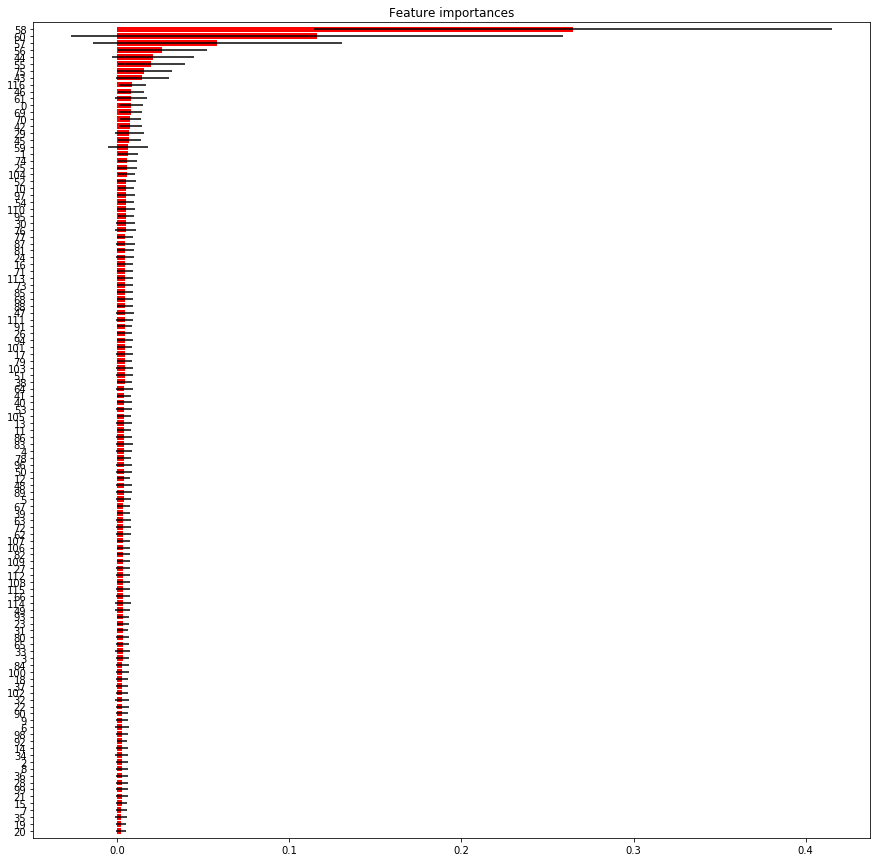

In [194]:
def plotting_feature_importance(importance):
    """Plot the feature importances of the forest"""
    std = np.std([modelo.feature_importances_ for modelo in model.estimators_],
                 axis=0)
    index = np.argsort(feten)
    plt.figure(figsize=(15, 15))
    plt.title("Feature importances")
    plt.barh(range(X_train.values.shape[1]), feten[index],
           color="r", xerr=std[index], align="center")

    plt.yticks(range(X_train.values.shape[1]), index)
    plt.ylim([-1, X_train.values.shape[1]])
    plt.show()
plotting_feature_importance(feten)

In [19]:
x.max()

0    0.265059
dtype: float64

In [25]:
top_40 = feten.argsort()[-40:][::-1]
top_40

In [162]:
lon_res = 13
lat_res = 9
nz = 26

lat_step = 0.5
lon_step = 0.5

lat_start = 44
lat_end = lat_start + lat_step  * (lat_res - 1) # calculas lat final
lon_start = -123
lon_end = lon_start + lon_step * (lon_res -1)  # calculas lon final - con esto puedes construir mesh

points = top_40

48.0


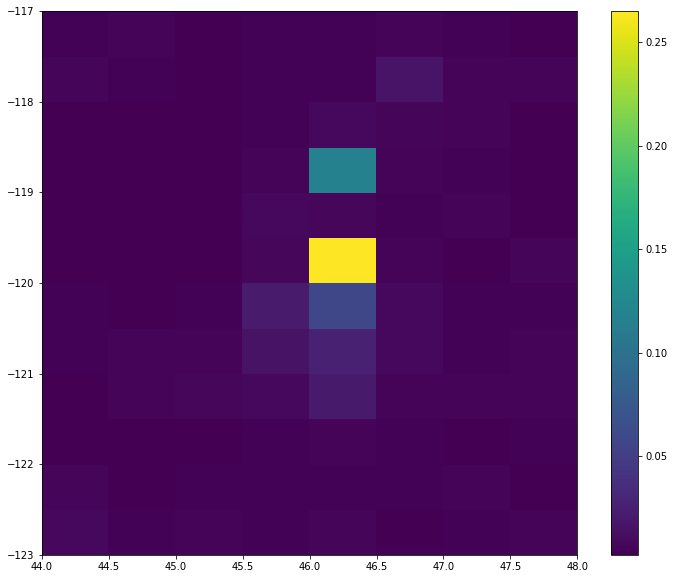

In [179]:
lat = np.linspace(start=lat_start, stop=lat_end, endpoint=lat_end, num=lat_res)
lon = np.linspace(start=lon_start, stop=lon_end, endpoint=lon_end, num=lon_res) # 
lon, lat = np.meshgrid(lon, lat)
Z = feten.reshape(lat_res, lon_res)
fig = plt.figure(figsize=(12, 10))
im = plt.pcolormesh(lat, lon, Z) # Asignas valores a su posición en el mapa
plt.colorbar(mappable=im)
 

In [159]:
x = np.meshgrid(lon, lat)
len(x), len(x[0])

(2, 117)

In [161]:
len(Z), len(Z[0])

(9, 13)

In [177]:
Z.argmax()

58

In [176]:
Z

array([[0.00804156, 0.00626194, 0.00282836, 0.00319662, 0.00408558,
        0.00374874, 0.00291142, 0.00251948, 0.00281439, 0.00292422,
        0.00540308, 0.00415573, 0.00387139],
       [0.0041942 , 0.00284277, 0.00265767, 0.00474361, 0.00435804,
        0.00305795, 0.00230298, 0.00226462, 0.00278048, 0.00296684,
        0.003339  , 0.00476288, 0.00564651],
       [0.00439833, 0.00352675, 0.00278999, 0.00718865, 0.00507849,
        0.00333363, 0.00298466, 0.00320367, 0.00283435, 0.00245562,
        0.00279489, 0.00304268, 0.00433525],
       [0.00373193, 0.00424467, 0.00428192, 0.00761402, 0.01465069,
        0.02085926, 0.00718566, 0.00831944, 0.00456159, 0.0038583 ,
        0.00340765, 0.00391023, 0.00434117],
       [0.00547527, 0.00424077, 0.00528343, 0.01994806, 0.02637228,
        0.05833756, 0.26505909, 0.00646748, 0.11623092, 0.00806804,
        0.00370716, 0.00372824, 0.00431749],
       [0.0032284 , 0.00343973, 0.00374041, 0.00457139, 0.00784798,
        0.00769342, 0.00468

In [182]:
positions = np.vstack([lat.ravel(),lon.ravel()])
ptos = np.hstack((lat.reshape((lat.size,1)), lon.reshape((lon.size,1))))

In [202]:
the_point = ptos[58]
the_point = list(the_point)
the_point

[46.0, -120.0]

In [209]:
def points(lat, lon): #insert values as (df[col_lat], df[col_lon])
    statmad = (lon, lat)
    statmadlist = statmad
    popup = the_point
    statmap = folium.Map(zoom_start=20) 
    return statmap    

#points(lon, lat)

#m = folium.Map(location=[(lat_start + lat_end) / 2, (lon_start + lon_end) / 2, ]).Marker(location=[45.18163, -120.15285],popup="Location").add_to(m)
    #folium.Marker(location=the_point,popup="Expected location"),
    #folium.Marker(location=[45.18163, -120.15285],popup="Real location")   
    
#map.add_child(zoom_start=7.25,
 #   tiles='Stamen Terrain')


m = folium.Map(
    location=[(lat_start + lat_end) / 2, (lon_start + lon_end) / 2, ],
    zoom_start=7,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'
folium.CircleMarker(location = [45.58163, -120.15285], radius = 100, popup = ' FRI ').add_to(m) 
folium.Marker(the_point, popup='<i>Result</i>', tooltip=tooltip).add_to(m)
folium.Marker([45.18163, -120.15285], popup='<b>Condon WindFarm</b>', tooltip=tooltip).add_to(m)
folium.PolyLine(locations = [(the_point), (45.18163, -120.15285)], line_opacity = 0.5).add_to(m) 
m